<a href="https://colab.research.google.com/github/EVA4-RS-Group/Phase2/blob/master/S3_FaceAlignment/EVA4_S3_face_alignment_and_swap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading standard Libraries and project modules

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!git clone https://github.com/EVA4-RS-Group/Phase2 -q --quiet
!mv /content/Phase2/S3_FaceAlignment/faceblendcommon.py /content/
!rm -rf Phase2

In [3]:
!rm -rf data
!rm -rf model
!rm -rf shape*.*
!rm -rf results
!mkdir data
!mkdir model
!mkdir results
!mkdir /content/data/images/

In [4]:
import dlib
import cv2
import numpy as np
#from renderFace import renderFace
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [5]:
# write landmark file or send landmark json
def writeLandmarksToFile(landmarks, landmarksFileName):
  with open (landmarksFileName, 'w') as f:
    for p in landmarks.parts():
      f.write("%s %s\n"%(int(p.x),int(p.y)))
  f.close()

MODEL_PATH = "/content/model/"
# Landmakr model location
PREDICTOR_PATH = MODEL_PATH + "shape_predictor_68_face_landmarks.dat"

In [6]:
!wget -q http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2
!mv shape_predictor_68_face_landmarks.dat /content/model 
!wget -q https://github.com/EVA4-RS-Group/Phase2/releases/download/s2/family.jpg
!mv family.jpg /content/data/images/
!wget -q https://github.com/EVA4-RS-Group/Phase2/releases/download/s2/face2.jpg
!mv face2.jpg /content/data/images/

In [7]:
# Get the face detector instance
faceDetector = dlib.get_frontal_face_detector()

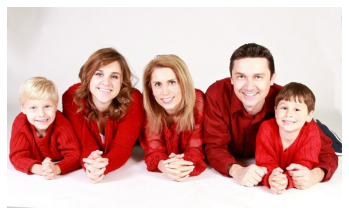

In [8]:
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

DATA_PATH = "/content/data/"
# Read image
imageFilename = DATA_PATH + "images/family.jpg"

im = cv2.imread(imageFilename)

# landmarks will be stored in results/family_i.txt
landmarksBasename = "results/family"

plt.imshow(im[:,:,::-1])
plt.axis("off")
plt.show()

In [9]:
# Detect faces in the image
faceRects = faceDetector(im,0)
print("Number of faces detected: ", len(faceRects))

# List to store landmarks of all detected faces
landmarksAll = []

# OUTPUT: Number of faces detected : 5

Number of faces detected:  5


In [10]:
def drawPolyline(im,landmarks, start, end, isClosed =False):
	points = []
	for i in range(start, end+1):
		point = [landmarks.part(i).x, landmarks.part(i).y]
		points.append(point)
	points = np.array(points, dtype=np.int32)
	cv2.polylines(im,[points],isClosed,(255,200,0), thickness =2, lineType = cv2.LINE_8)

def renderFace(im, landmarks):
  assert(landmarks.num_parts == 68)
  drawPolyline(im, landmarks, 0,16)
  drawPolyline(im, landmarks, 17,21)
  drawPolyline(im, landmarks, 22,26)
  drawPolyline(im, landmarks, 27,30)
  drawPolyline(im, landmarks, 30,35, True)
  drawPolyline(im, landmarks, 36,41, True)
  drawPolyline(im, landmarks, 42,47, True)
  drawPolyline(im, landmarks, 48,59, True)
  drawPolyline(im, landmarks, 60,67, True)



In [11]:
# loop over all detected face rectangles

for i in range(0, len(faceRects)):
  newRect = dlib.rectangle(int(faceRects[i].left()),
                           int(faceRects[i].top()),
                           int(faceRects[i].right()),
                           int(faceRects[i].bottom()))
  # for every face rectangle run landmarkDetector
  landmarks = landmarkDetector(im, newRect)

  if i == 0:
    print("Number of landmarks", len(landmarks.parts()))

  #store landmarks for current face

  landmarksAll.append(landmarks)

  # Next we render the outline of face using detected landmarks

  renderFace(im, landmarks)

  landmarksFileName = landmarksBasename + "_" + str(i)+ ".txt"
  print("Saving landmarks to ", landmarksFileName)
  writeLandmarksToFile(landmarks, landmarksFileName)

Number of landmarks 68
Saving landmarks to  results/family_0.txt
Saving landmarks to  results/family_1.txt
Saving landmarks to  results/family_2.txt
Saving landmarks to  results/family_3.txt
Saving landmarks to  results/family_4.txt


In [12]:
outputFileName = "results/familyLandmarks.jpg"
print("saving output image to", outputFileName)

cv2.imwrite(outputFileName, im)

saving output image to results/familyLandmarks.jpg


True

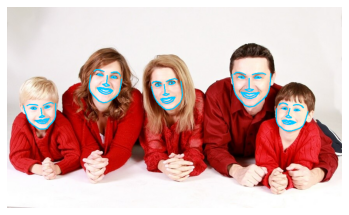

In [13]:
plt.imshow(im[:,:,::-1])
plt.axis("off")
plt.show()

In [14]:
!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_5_face_landmarks.dat.bz2
!mv shape_predictor_5_face_landmarks.dat /content/model 

--2020-08-18 16:45:03--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2’

shape_predictor_5_f 100%[===================>]   5.44M  3.00MB/s    in 1.8s    

2020-08-18 16:45:05 (3.00 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2’ saved [5706710/5706710]



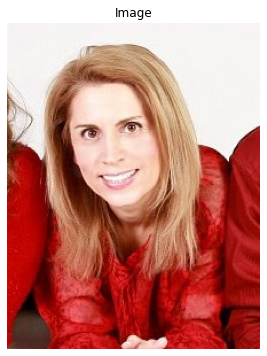

In [15]:
import faceblendcommon as fbc

# Landmark model location
PREDICTOR_PATH = MODEL_PATH + "shape_predictor_5_face_landmarks.dat"

# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# Read image
im = cv2.imread(DATA_PATH + "images/face2.jpg")

plt.imshow(im[:,:,::-1])
plt.title("Image")
plt.axis("off")
plt.show()

In [16]:
# Detect landmarks
points = fbc.getLandmarks(faceDetector, landmarkDetector, im)

points = np.array(points)

# Convert image to floating point in the range 0 to 1
im = np.float32(im)/255.0

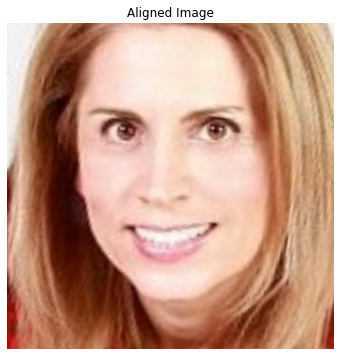

In [17]:
# Dimension of output image
h = 600
w = 600

# Normalize image to output co-orindates
imNorm, points = fbc.normalizeImagesAndLandmarks((h,w), im, points)

imNorm = np.uint8(imNorm*255)

# Display the results
plt.imshow(imNorm[:,:,::-1])
plt.title("Aligned Image")
plt.axis("off")
plt.show()